# Avocado Prices Dataset

The dataset contains information on the average prices of avocados sold in the United States between 2015 and 2018. It includes data on the type of avocado (organic or conventional), the region where it was sold, the date of sale, and the average price per unit.

### Points of interest in this dataset

I'm most interested in finding out how region, season or type of avocado influence the total volume of sold avocados or price.

#### Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold
     - Small/Medium Hass Avocado (~3-5oz avocado) 
     
4225 - Total number of avocados with PLU 4225 sold
     - Large Hass Avocado (~8-10oz avocado)  
     
4770 - Total number of avocados with PLU 4770 sold
     - Extra Large Hass Avocado (~10-15oz avocado)

In [152]:
df = pd.read_csv("avocado.csv")
df.info()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float

In [196]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,small_medium,large,extra_large,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [156]:
df.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

### Structure of avocado dataset

There are 18,249 rows of weekly sales with 13 variables (date, average price, total volume, volume of each size (small/medium, large, extra large), total bags (small, large, xlarge), year, region, and type of avocado. Most variables are numeric, representing the volume of sales. Date, region, and type are categorical.

## Raw Data

Dispaly of raw data

In [82]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

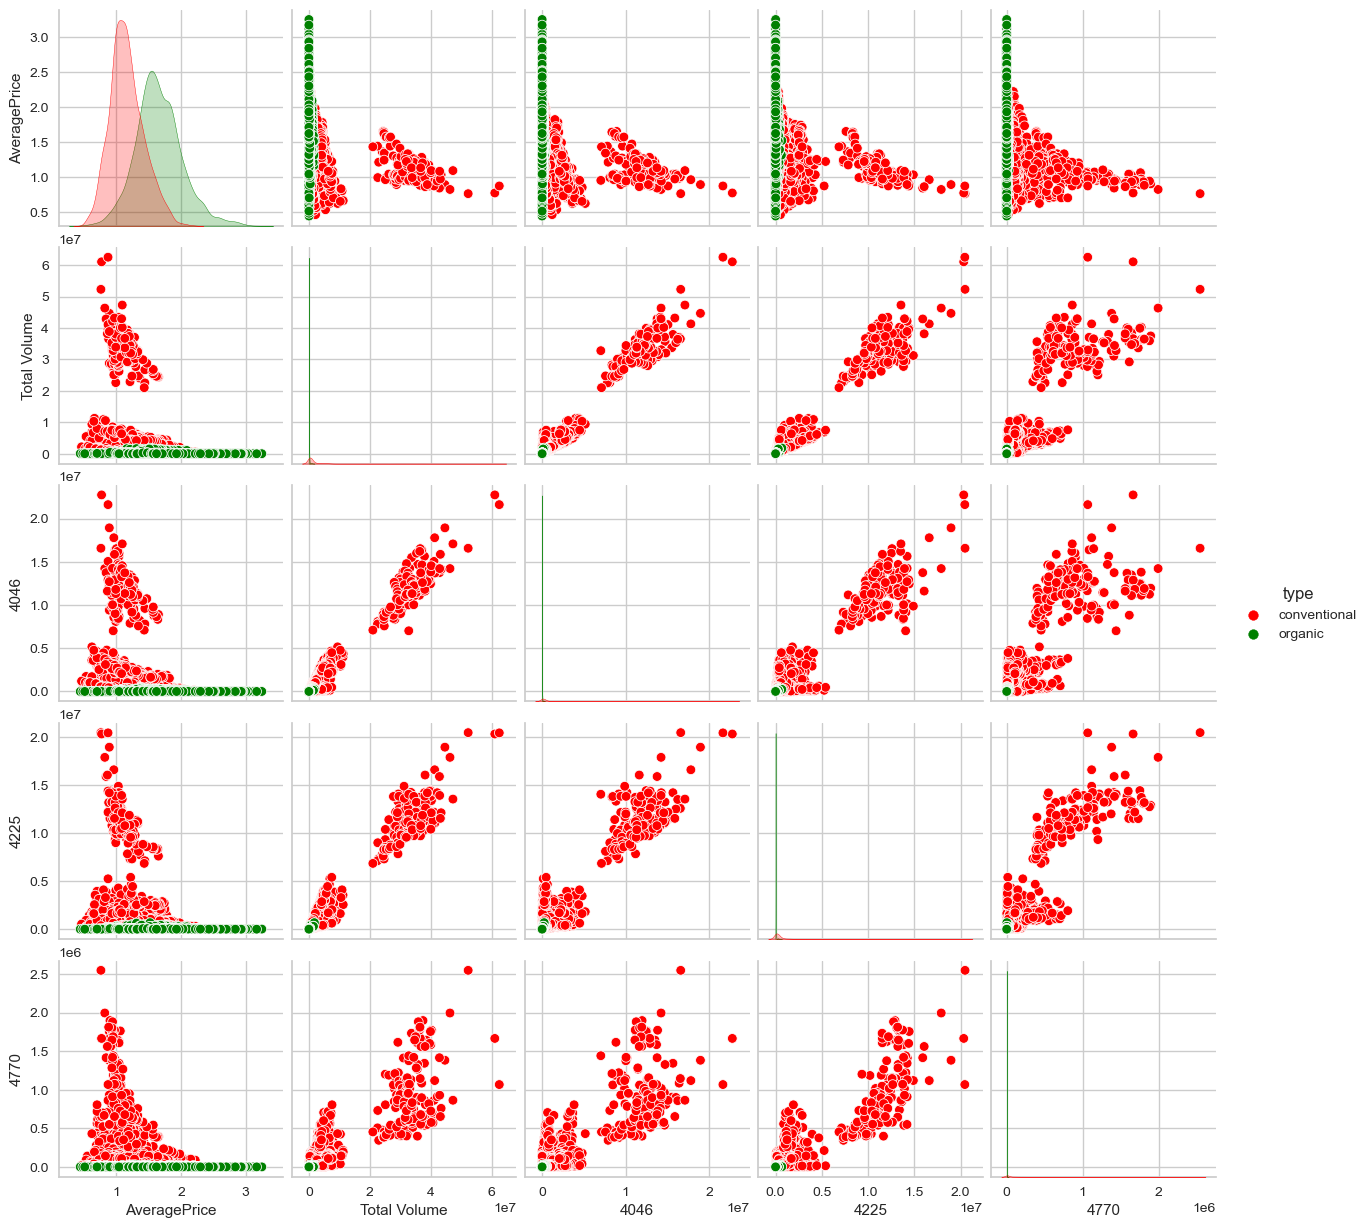

In [34]:
# Define variables to plot
to_plot = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'type']

# Define color palette
palette = {'conventional':'red', 'organic':'green'}

# Create pair plot
sns.pairplot(df[to_plot], hue="type", palette=palette)
plt.show()


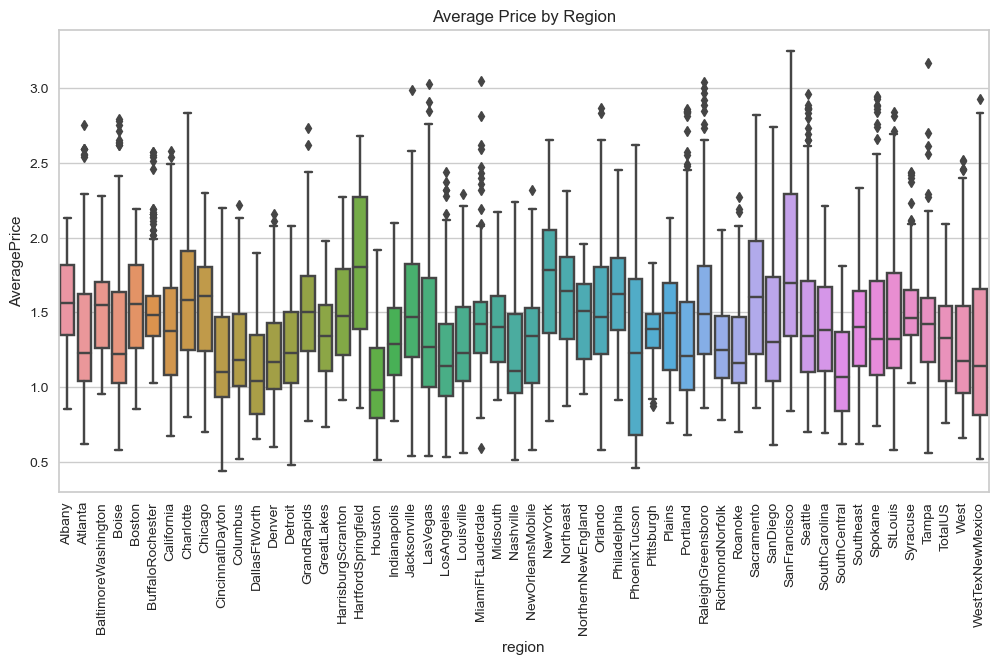

In [157]:
# Create a boxplot of the average price by region
plt.figure(figsize=(12, 6))  # Set the figure size to 12 inches wide by 6 inches high
sns.boxplot(x='region', y='AveragePrice', data=df)
plt.xticks(rotation=90)
plt.title('Average Price by Region')
plt.show()


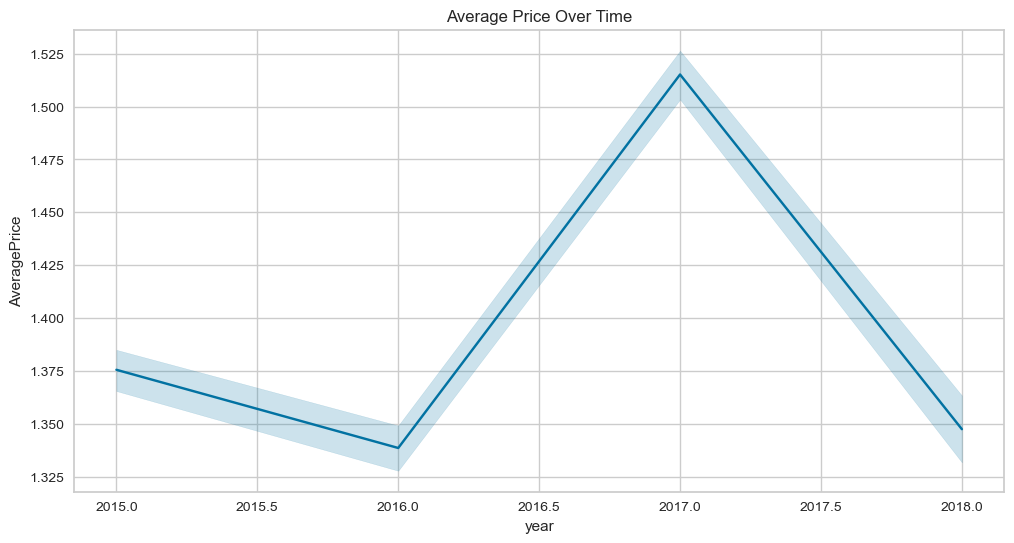

In [158]:
# Create a line plot of the average price over time
plt.figure(figsize=(12, 6)) 
sns.lineplot(x='year', y='AveragePrice', data=df)
plt.title('Average Price Over Time')
plt.show()

## Cleaning Data

Cleaning and formatting the data

In [162]:
# Rename PLU number columns to descriptive names 
df.rename(columns={'4046':'small_medium', '4225':'large', '4770':'extra_large'}, inplace=True)

# Convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Identify outliers (threshold = 2)
outliers = (abs(z_scores) > 2).any(axis=1)

# Use date to create categorical 'season_name' column
df['season'] = (df['Date'].dt.month%12 + 3)//3

seasons = {
             1: 'Winter',
             2: 'Spring',
             3: 'Summer',
             4: 'Autumn'
}

df['season_name'] = df['season'].map(seasons)

# Convert season_name to ordinal categorical types
ordinal_var_dict = {'season_name': ['Spring', 'Summer', 'Autumn', 'Winter']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

# Drop unnecessary 'season' column
df.drop(columns='season', inplace=True)

# Save the DataFrame into a CSV file
df_cleaned.to_csv('AvocadoC.csv', index=False)



1.Renaming PLU number columns to more descriptive names: '4046' = 'small_medium', '4225' = 'large', '4770' = 'extra_large'.

2.Convert 'Date' column to datetime: The 'Date' column in the DataFrame is converted to datetime format using the `pd.to_datetime()` function.

3.Identify outliers: The code calculates z-scores for each row in the DataFrame and checks if any z-score is greater than 2. It creates a boolean Series called 'outliers' where `True` represents rows with outliers.

4.Create 'season' column: A new column 'season' is created in the DataFrame by calculating the season number based on the month of the 'Date' column.

5.Map 'season' to 'season_name': The 'season' column is mapped to corresponding season names using a dictionary called 'seasons'. The result is stored in a new column 'season_name'.

6.Convert 'season_name' to ordinal categorical type: The 'season_name' column is converted to an ordinal categorical type with ordered categories: 'Spring', 'Summer', 'Autumn', 'Winter'.

7.Drop 'season' column: The 'season' column is dropped from the DataFrame as it is no longer needed.

8.Save DataFrame to CSV file: The cleaned DataFrame `df_cleaned` is saved to a CSV file named 'AvocadoC.csv' without including the index.



In [168]:
# Select numerical columns for z-score method
numerical_cols = ['AveragePrice', 'Total Volume', 'small_medium', 'large', 'extra_large']

# Calculate z-scores for numerical columns
from scipy.stats import zscore
z_scores = zscore(df_cleaned[numerical_cols])

# Create a new column with the year
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Create a new column with the month
df_cleaned['Month'] = df_cleaned['Date'].dt.month

# Remove outliers from the dataframe
df_cleaned = df_cleaned[~outliers]

df_cleaned.drop('year', axis=1, inplace=True) 
df_cleaned.drop('Unnamed: 0', axis=1, inplace=True)


1.Select numerical columns: The code selects specific columns from the `df_cleaned` DataFrame that contain numerical data. These columns are 'AveragePrice', 'Total Volume', 'small_medium', 'large', and 'extra_large'. These columns will be used for calculating z-scores.

2.Calculate z-scores: The code uses the `zscore` function from the `scipy.stats` module to calculate the z-scores for the selected numerical columns. The z-scores measure how many standard deviations each data point is from the mean of its respective column.

4.Create new columns for year and month: The code extracts the year and month from the 'Date' column and creates two new columns, 'Year' and 'Month'. This enables analyzing the data based on year and month.

5.Remove outliers: The code filters out the rows identified as outliers by using the boolean Series 'outliers'. Rows that are flagged as outliers are removed from the `df_cleaned` DataFrame using the `~` operator.

6.Drop unnecessary columns: The code drops the 'year' and 'Unnamed: 0' columns from the `df_cleaned` DataFrame using the `drop()` method. These columns are not needed for further analysis or are redundant.


## Clean Data

Display of plots using cleaned dataset

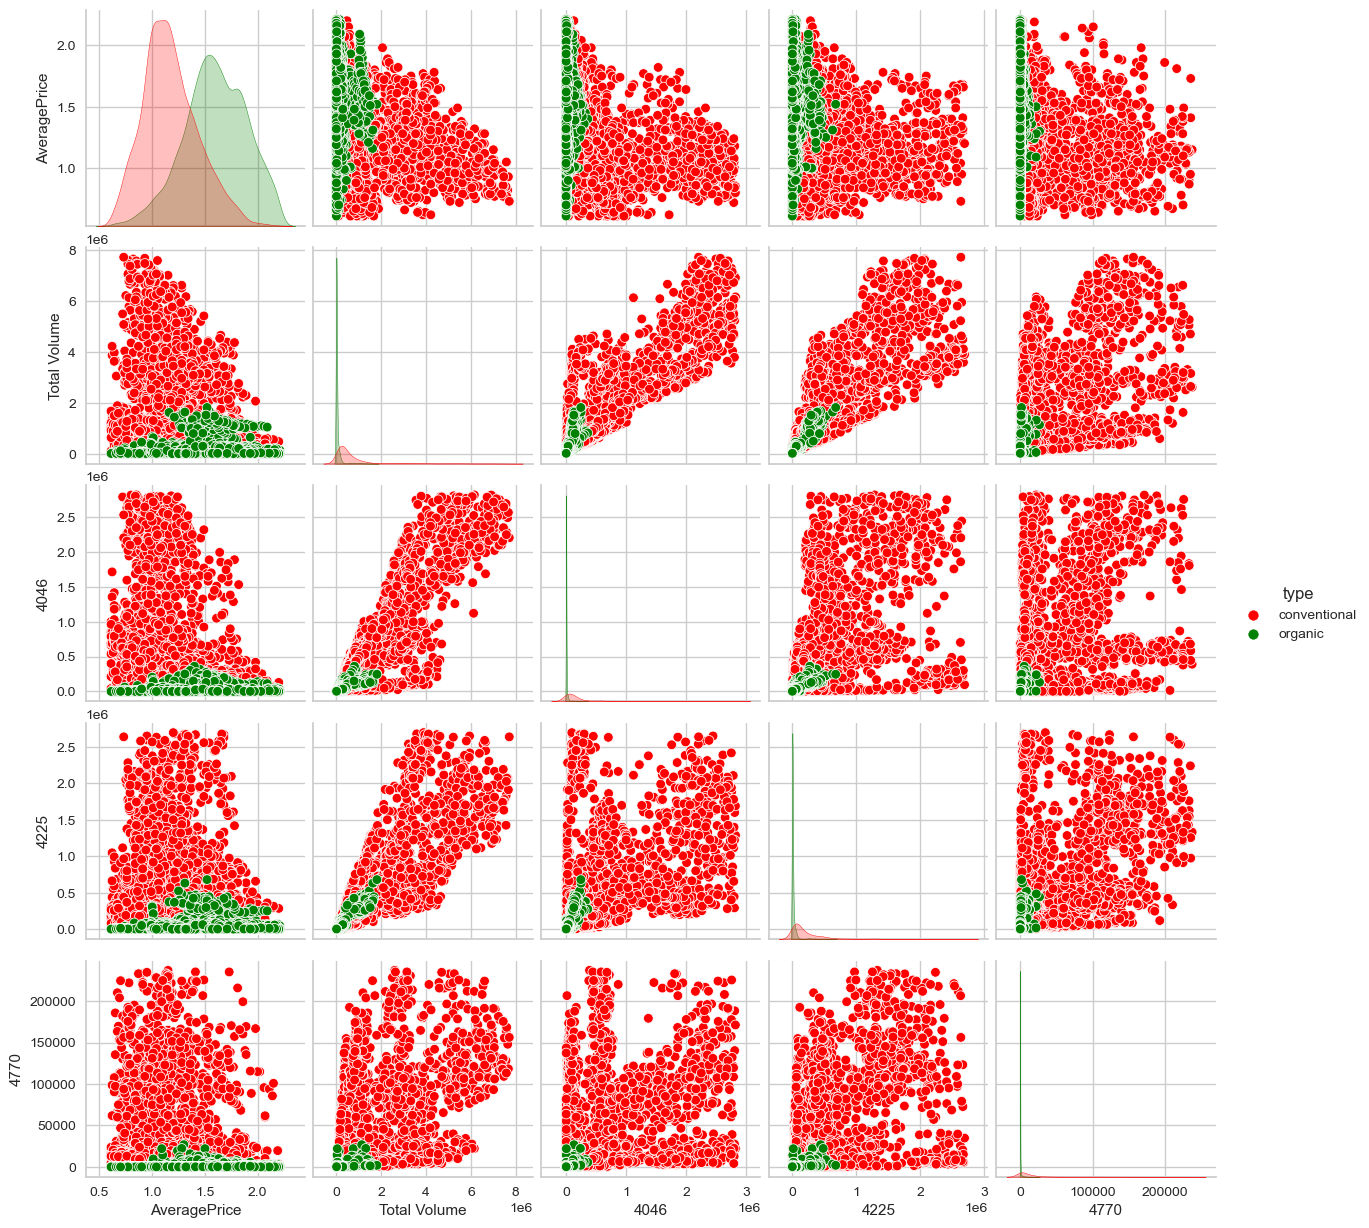

In [162]:
sns.pairplot(df_cleaned[to_plot], hue="type", palette=palette)
plt.show()

The pair plot provides a visual representation of the relationships between pairs of variables. Each scatter plot in the grid represents the relationship between two variables. The diagonal plots show the distribution of each individual variable.

By using the "hue" parameter, the pair plot allows for further differentiation of the data points based on the "type" column. This can help in visually identifying patterns or differences between different categories or groups within the dataset.

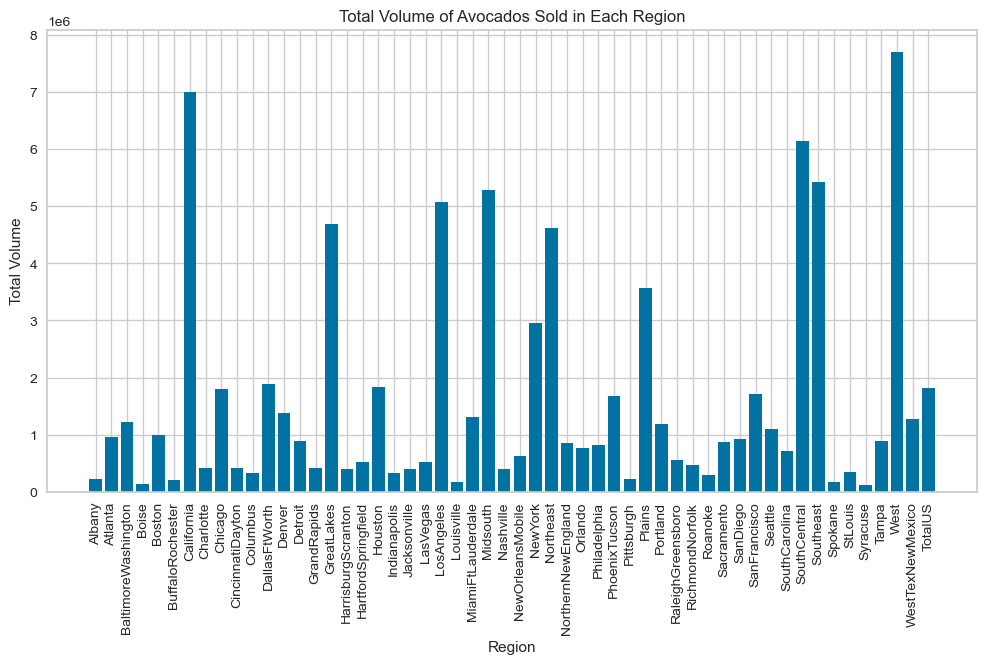

In [163]:
# Bar chart of total volume sold in each region
plt.figure(figsize=(12, 6)) 
plt.bar(df_cleaned["region"], df_cleaned["Total Volume"])
plt.xlabel("Region")
plt.ylabel("Total Volume")
plt.xticks(rotation=90)
plt.title("Total Volume of Avocados Sold in Each Region")
plt.show()

The bar chart provides a visual representation of the total volume of avocados sold in each region. Each region is represented by a bar, and the height of each bar corresponds to the total volume of avocados sold in that region. This chart allows for easy comparison between regions and identification of regions with higher or lower total volumes.

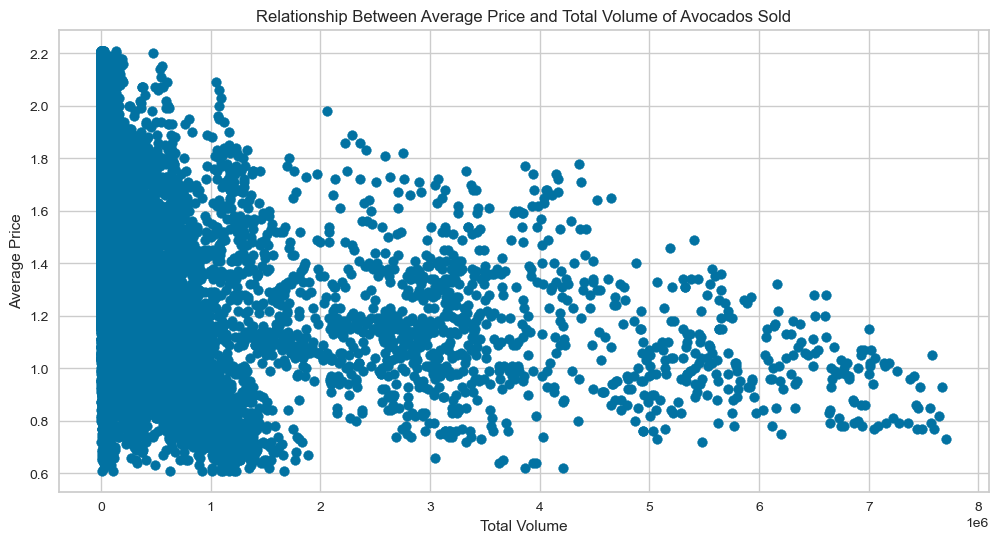

In [164]:
# Scatter plot of average price vs total volume sold
plt.figure(figsize=(12, 6)) 
plt.scatter(df_cleaned["Total Volume"], df_cleaned["AveragePrice"])
plt.xlabel("Total Volume")
plt.ylabel("Average Price")
plt.title("Relationship Between Average Price and Total Volume of Avocados Sold")
plt.show()

The scatter plot helps visualize the relationship between the average price and total volume of avocados sold. Each point on the plot represents a specific combination of total volume and average price. The x-axis represents the total volume, and the y-axis represents the average price.

In this case, the data points are densely packed on the left side of the plot and gradually become more scattered as you move to the right. This indicates that there may be different subgroups or clusters within the data.
The busy pattern on the left side from top to bottom suggests that there are specific ranges of total volume where the average price remains relatively consistent or varies within a narrow range. This could be attributed to various factors such as market segmentation, pricing strategies, or specific customer preferences.
As you move towards the right side of the plot and the data points become more spread out, it indicates a wider range of total volume and a greater variability in average prices. This suggests that as the total volume increases, the average price becomes more diverse, with a wider range of prices observed.


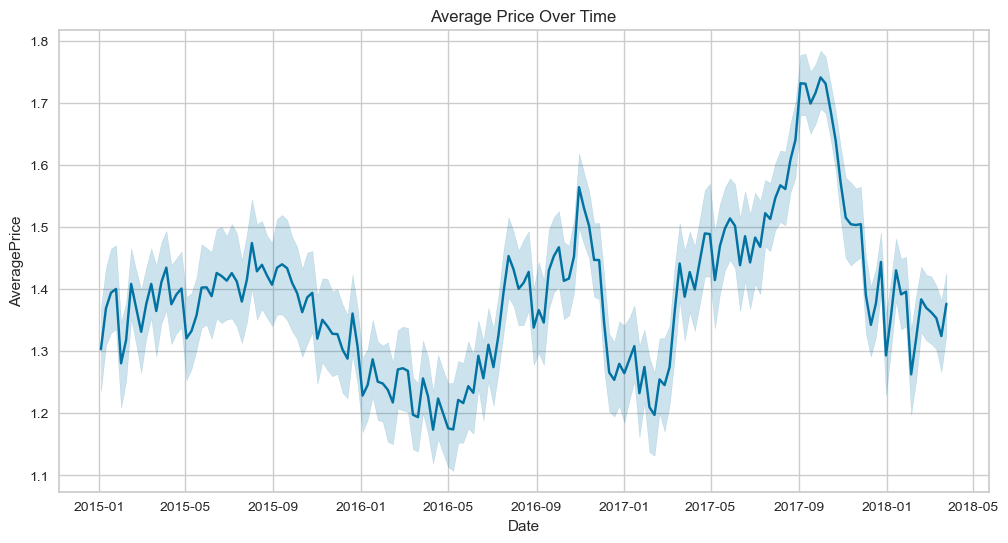

In [185]:
# Create a line plot of the average price over time
plt.figure(figsize=(12, 6)) 
sns.lineplot(x='Date', y='AveragePrice', data=df_cleaned)
plt.title('Average Price Over Time')
plt.show()

This plot shows how the average price of avocados has changed over time. The x-axis shows the dates, while the y-axis shows the average price. The line represents the trend of the average price over time. From this plot, we can see whether the average price has been increasing, decreasing, or staying relatively stable over time. We can also identify any seasonal patterns or trends in the data.

What this plot is showing us is that the price increases each year in Autumn and drops in Winter. 

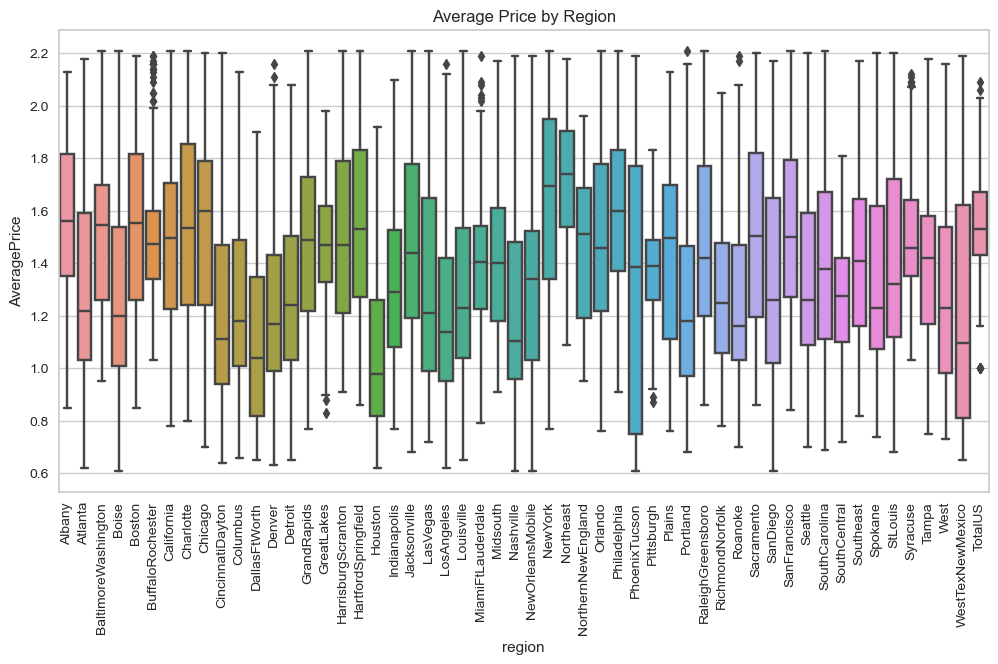

In [166]:
# Create a boxplot of the average price by region
plt.figure(figsize=(12, 6))  # Set the figure size to 12 inches wide by 6 inches high
sns.boxplot(x='region', y='AveragePrice', data=df_cleaned)
plt.xticks(rotation=90)
plt.title('Average Price by Region')
plt.show()

This boxplot represents the distribution of average prices of avocados across different regions. Each box represents the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box represents the median (50th percentile) of the data. The whiskers extend to the minimum and maximum values within 1.5 times the IQR. Points beyond the whiskers are considered outliers.

By examining this plot, we can compare the average prices of avocados across different regions and identify any variations or outliers. It helps us understand the distribution and variability of average prices within each region. Additionally, we can observe any regional differences or trends in avocado prices.

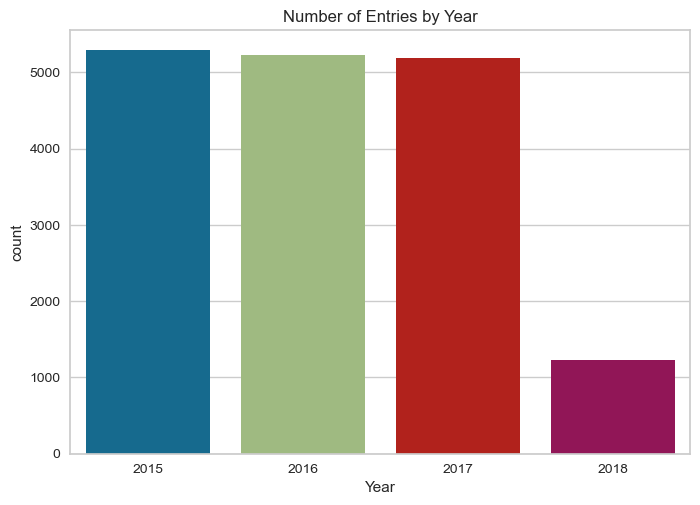

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.countplot(x='Year', data=df_cleaned)
plt.title('Number of Entries by Year')
plt.show()


The countplot displays the count of occurrences of each unique value of the 'Year' column on the x-axis. Each bar's height represents the number of entries associated with that particular year. This plot helps visualize the distribution and comparison of the number of entries across different years.

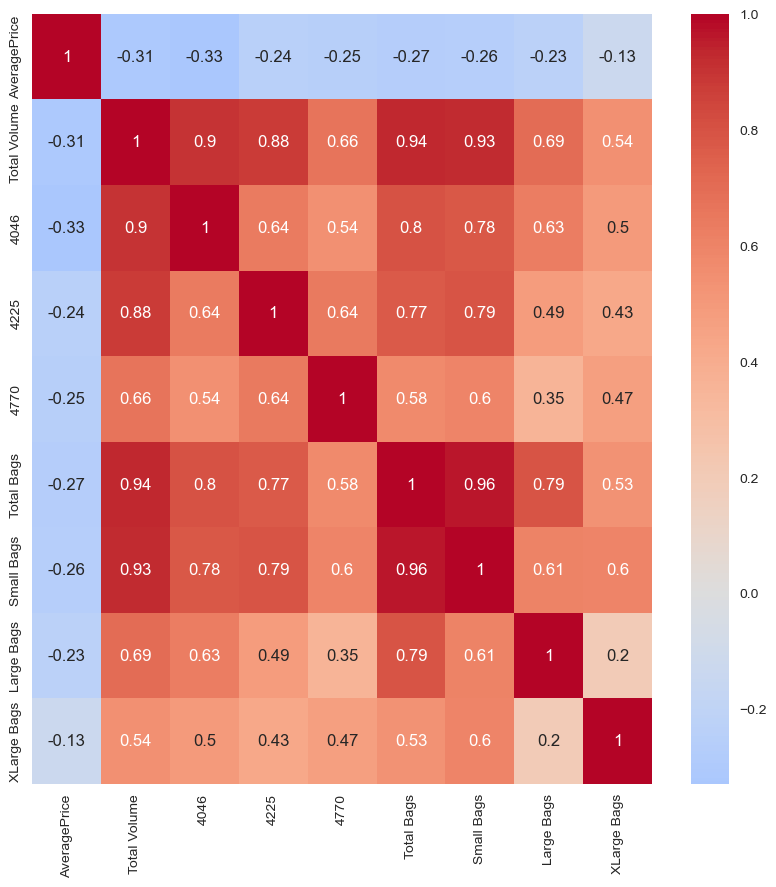

In [173]:
# create correlation matrix
corrmat = df_cleaned.corr()

# plot heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', center=0, ax=ax)
plt.show()

The correlation matrix is a square matrix that shows the correlation coefficients between pairs of variables in the DataFrame.
A heatmap is created using sns.heatmap(). The heatmap visualizes the correlation matrix as a grid of colored cells. The annot=True parameter displays the correlation coefficients in each cell of the heatmap. The cmap='coolwarm' parameter sets the color map to 'coolwarm', which ranges from cool colors (e.g., blue) for negative correlations to warm colors (e.g., red) for positive correlations. The center=0 parameter sets the center of the colormap at zero, making zero correlations appear as a neutral color (e.g., white). The ax=ax parameter assigns the created heatmap to the ax variable.

What we can read from this is that "Average Price" has negative correlation to all variables connected to volume of all types of avocado as well as all variables connected to different types of bags.

Furthermore, we can see that the correlation is the strongest between "Total Volume" and "Small Bags", "Total Bags", "Small/Medium" avocados and "Large" avocados. As well as between "Total Bags" and "Small Bags".

Organic avocados: 9126     1.83
9127     1.89
9128     1.85
9129     1.84
9130     1.94
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 8494, dtype: float64
Conventional avocados: 0       1.33
1       1.35
2       0.93
3       1.08
4       1.28
        ... 
9121    0.76
9122    0.85
9123    0.84
9124    0.90
9125    0.88
Name: AveragePrice, Length: 8441, dtype: float64


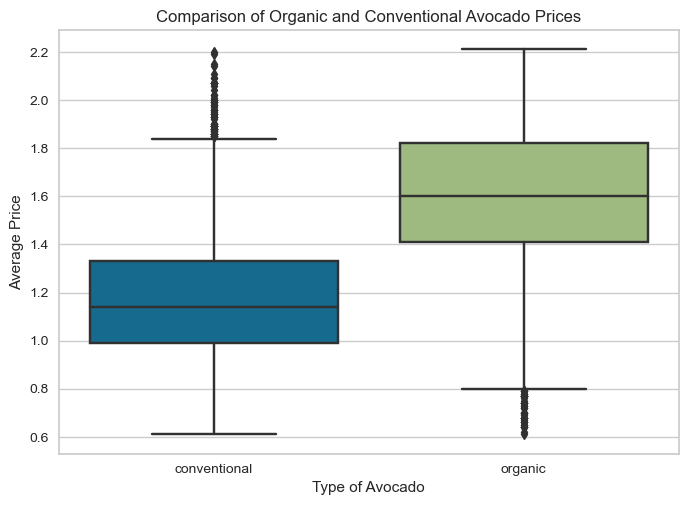

T-test results:
t-statistic: 99.49344680093692
p-value: 0.0
ANOVA results:
F-statistic: 9898.945956330863
p-value: 0.0


In [76]:

# Subset the dataset to include only organic and conventional avocados
organic_avocados = df_cleaned[df_cleaned.type == 'organic']['AveragePrice']
conventional_avocados = df_cleaned[df_cleaned.type == 'conventional']['AveragePrice']

# Print the values of organic_avocados and conventional_avocados to check for missing values
print('Organic avocados:', organic_avocados)
print('Conventional avocados:', conventional_avocados)

# Data visualization
sns.boxplot(x='type', y='AveragePrice', data=df_cleaned)
plt.title('Comparison of Organic and Conventional Avocado Prices')
plt.xlabel('Type of Avocado')
plt.ylabel('Average Price')
plt.show()

# Statistical tests
t_statistic, p_value = ttest_ind(organic_avocados, conventional_avocados)
print('T-test results:')
print('t-statistic:', t_statistic)
print('p-value:', p_value)

f_statistic, p_value = f_oneway(organic_avocados, conventional_avocados)
print('ANOVA results:')
print('F-statistic:', f_statistic)
print('p-value:', p_value)


The t-test result indicates that there is a significant difference in average price between organic and conventional avocados. The t-statistic value of 99.49 indicates that the difference in means between the two groups is significant, and the p-value of 0.0 indicates that the likelihood of obtaining such a difference by chance is extremely low.

The ANOVA result confirms that there is a significant difference in average price between the two groups. The F-statistic of 9898.95 and the p-value of 0.0 indicate that the variability in prices between the two groups is significantly greater than the variability within each group, and that this difference is not likely due to chance.

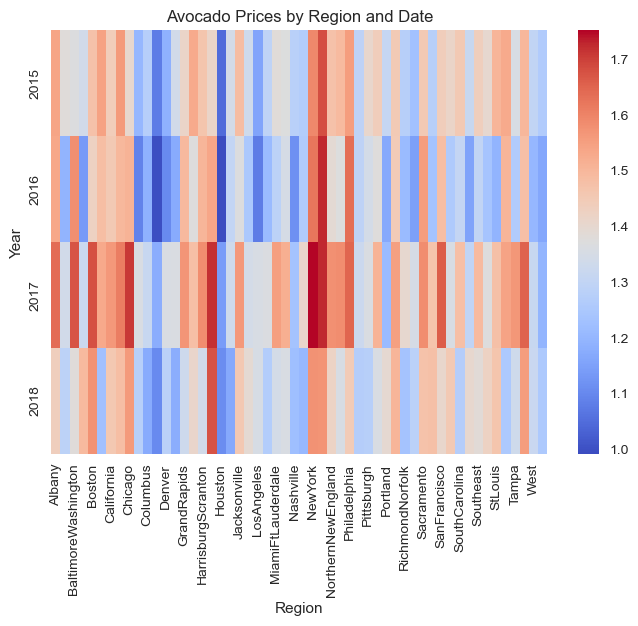

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'Year' column to a datetime object
df_cleaned['Year'] = pd.to_datetime(df_cleaned['Year'], format='%Y')

# Create a pivot table to calculate the average avocado price for each region and date
avocado_prices_pivot = pd.pivot_table(df_cleaned, values='AveragePrice', index=pd.DatetimeIndex(df_cleaned['Year']).year, columns='region')

# Create a heatmap to visualize the avocado prices by region and formatted date
sns.heatmap(avocado_prices_pivot, cmap='coolwarm')
plt.title('Avocado Prices by Region and Date')
plt.xlabel('Region')
plt.ylabel('Year')
plt.show()


The x-axis represents the different regions where avocados are sold.
The y-axis represents the years in which the avocado prices are calculated.
Each cell in the heatmap corresponds to the average price of avocados for a specific region and year. The color of the cell indicates the magnitude of the average price, with cooler colors (such as blue) representing lower prices and warmer colors (such as red) representing higher prices.
The heatmap allows us to visually compare the average avocado prices across different regions and years. It helps identify regions or years with higher or lower avocado prices and observe any patterns or trends in the price fluctuations over time.

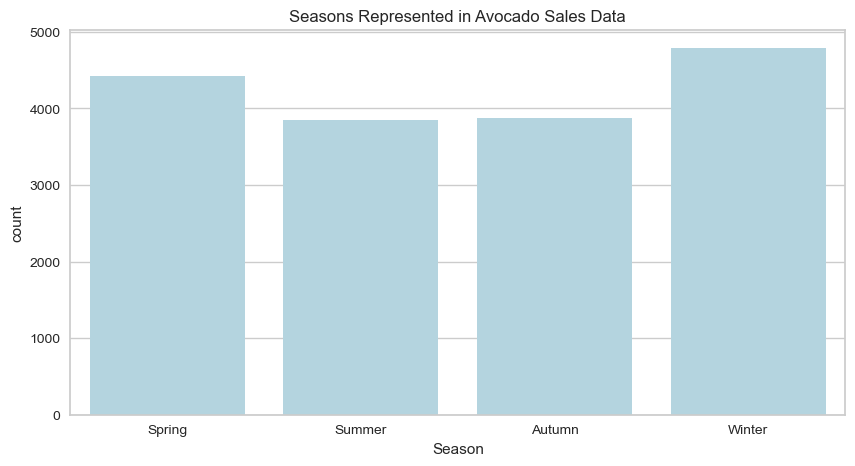

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[10, 5])

sns.countplot(data=df_cleaned, x='season_name', color='lightblue')
plt.title('Seasons Represented in Avocado Sales Data')
plt.xlabel('Season')

plt.show()


This countplot visualizes the distribution of avocado sales data across different seasons. 
The x-axis represents the seasons, which are categorized as "Spring," "Summer," "Autumn," and "Winter."
The y-axis represents the count of occurrences or frequency of avocado sales data in each season.
Each bar in the countplot represents a season, and the height of the bar indicates the number of occurrences of avocado sales data in that season. It allows us to observe any variations or imbalances in the number of occurrences between seasons.


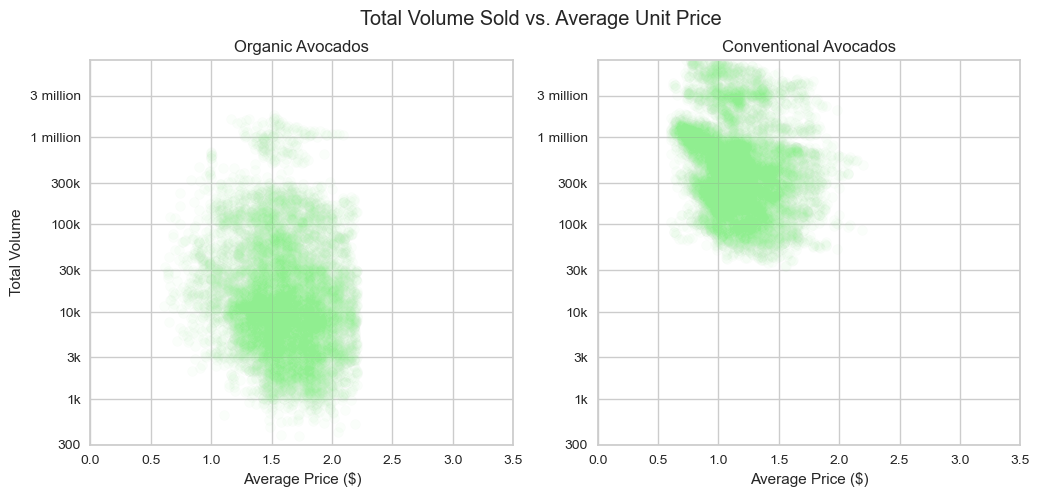

In [192]:
# Separate data into organic and conventional dataframes
organic = df_cleaned[df_cleaned['type'] == 'organic']
conventional = df_cleaned[df_cleaned['type'] == 'conventional']

# Divide figure into two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Create scatterplots of price vs. volume for both types
# Data is very overplotted so alpha=1/25
axes[0].scatter(x=organic['AveragePrice'], y=organic['Total Volume'], color='lightgreen', alpha=1/25)
axes[1].scatter(x=conventional['AveragePrice'], y=conventional['Total Volume'], color='lightgreen', alpha=1/25)

# Volume has large range so better represented by log scale
axes[0].set_yscale('log')

# Label and title first plot
axes[0].set_xlabel('Average Price ($)')
axes[0].set_ylabel('Total Volume')
axes[0].set_title('Organic Avocados')

# Label and title second plot
axes[1].set_yscale('log')
axes[1].set_xlabel('Average Price ($)')
axes[1].set_title('Conventional Avocados')

plt.suptitle('Total Volume Sold vs. Average Unit Price')

# Set axes to match log scale
plt.setp(axes, yscale='log', yticks=[300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000, 30000000],
         yticklabels=[300, '1k', '3k', '10k', '30k', '100k', '300k', '1 million', '3 million', '10 million', '30 million'])

# Set axis limits so axes are aligned and data is easy to accurately compare visually
axes[0].set_ylim([300, df_cleaned['Total Volume'].max()])
axes[0].set_xlim(0, 3.5)
axes[1].set_ylim([300, df_cleaned['Total Volume'].max()])
axes[1].set_xlim(0, 3.5)

plt.show()


The figure allows for a visual comparison between organic and conventional avocados in terms of their average price and total volume sold. The logarithmic scale on the y-axis helps in visualizing the wide range of volumes sold. By plotting the data separately for organic and conventional avocados, it becomes easier to observe any differences or similarities in the relationship between price and volume for each type.


## Clustering

 Clustering is a type of unsupervised machine learning that involves grouping data points together based on their similarities. In the case of the avocado dataset, clustering can be used to group different regions based on their avocado prices and volume sold.
 Before performing clustering analysis, it is important to preprocess and normalize the data appropriately to account for differences in scale and variability between different variables.
 

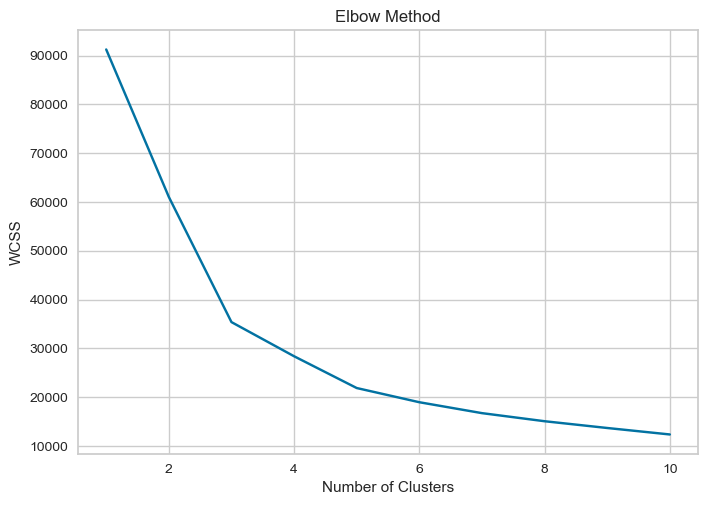

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('AvocadoC.csv')

# Subset the data with the relevant columns for clustering
X = data[['AveragePrice', 'Total Volume', 'Total Bags', 'type', 'region']]

# Convert categorical variables to numerical using label encoding
le = LabelEncoder()
X['type_numeric'] = le.fit_transform(X['type'])
X['region_numeric'] = le.fit_transform(X['region'])

# Drop the original categorical columns
X.drop(['type', 'region'], axis=1, inplace=True)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



The elbow method is a popular approach used to determine the optimal number of clusters in a dataset. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and selecting the number of clusters where the rate of decrease in WCSS slows down and forms an "elbow" shape.
By observing the elbow curve, we can determine the appropriate number of clusters for the specific dataset based on the location of the elbow point.
This plot shows us 2 potential elbows, suggesting that we can form 3 or 5 clusters. So I decided to proceed with the next step.

Elbow Method to determine the number of clusters to be formed:


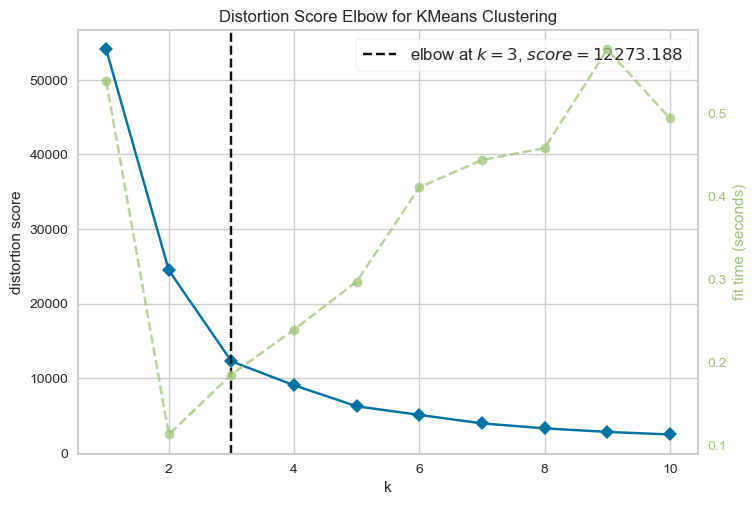

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [206]:
# Subset the data to relevant columns
X = X[['AveragePrice', 'Total Volume', 'Total Bags']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
PCA_ds = pca.fit_transform(X_scaled)

# Elbow method to find the optimal number of clusters
print('Elbow Method to determine the number of clusters to be formed:')
elbow_visualizer = KElbowVisualizer(KMeans(), k=range(1, 11))
elbow_visualizer.fit(PCA_ds)
elbow_visualizer.show()


The distortion score, also known as the within-cluster sum of squares (WCSS), is a measure of how tightly grouped the data points are within each cluster. In the context of the Elbow Method for K-means clustering, the distortion score represents the sum of squared distances between each data point and its centroid within a cluster.

The Elbow Method aims to find the optimal number of clusters by evaluating the trade-off between the number of clusters and the distortion score. The idea is to choose the number of clusters at the point where the decrease in distortion score begins to level off, forming an "elbow" shape in the plot.

In the Elbow Method, you typically plot the distortion score against the number of clusters and look for the point where adding more clusters does not significantly reduce the distortion score anymore. This point indicates a good balance between capturing the underlying patterns in the data and avoiding excessive fragmentation or overfitting.

in this example the optimal number of clusters would be 3.

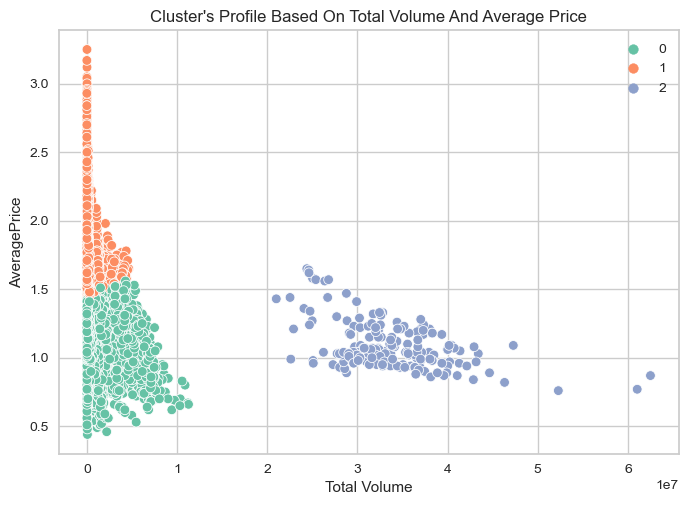

In [207]:
# Cluster the data using KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataset
X['cluster'] = y_kmeans

# Visualize the clusters
sns.scatterplot(data=X, x="Total Volume", y="AveragePrice", hue="cluster", palette="Set2")
plt.title("Cluster's Profile Based On Total Volume And Average Price")
plt.legend()
plt.show()


cluster 0: low total volume, low average price
cluster 1: low total volume, high average price
cluster 2: high total volume, low average price

The resulting scatter plot shows the profile of the clusters based on the 'Total Volume' and 'AveragePrice' variables. Each point represents a data point, and its color indicates the cluster it belongs to. This visualization helps to understand how the clusters are distributed in the feature space and identify any patterns or separations between clusters.

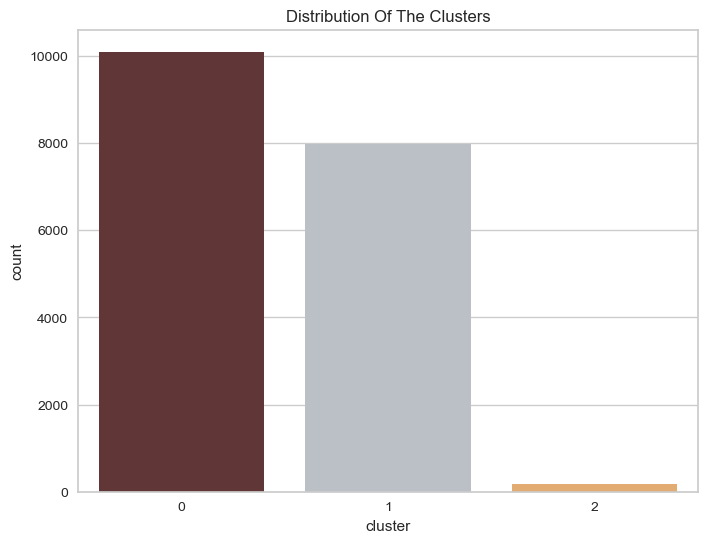

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the color palette
pal = ["#682F2F","#B9C0C9","#F3AB60"]

# Plot the countplot
plt.figure(figsize=(8,6))
sns.countplot(x=X['cluster'], palette=pal)
plt.title("Distribution Of The Clusters")
plt.show()


The resulting countplot shows the distribution of data points across the clusters. Each bar represents a cluster, and its height corresponds to the number of data points assigned to that cluster. This visualization provides an overview of the distribution and relative sizes of the clusters.

In [226]:
# Group the data by cluster and avocado type and count the number of occurrences
avocado_counts = X.groupby(['cluster', 'type_numeric'])['type_numeric'].count()

# Print the avocado counts for each cluster
for cluster_num in avocado_counts.index.levels[0]:
    print("Cluster", cluster_num)
    print(avocado_counts[cluster_num])


Cluster 0
type_numeric
0    7705
1    9112
Name: type_numeric, dtype: int64
Cluster 1
type_numeric
0    169
Name: type_numeric, dtype: int64
Cluster 2
type_numeric
0    1252
1      11
Name: type_numeric, dtype: int64


### Conclusion

From this analysis we can conclude that the highest total volume of avocdos sold is in California, Los Angeles, Midsouth, South Central, South East and West.

We can observe how average price changes over time: average price stays relatively stable, with seasonal increasing in Autumn and decreasing in Winter.

The price in organic and conventional avocados: The t-test result indicates that there is a significant difference in average price between organic and conventional avocados, however the likelihood of obtaining such a difference by chance is extremely low.
